# Risk Adjusted Returns

In [30]:
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
prices = pd.read_csv('sample_prices.csv')
returns = prices.pct_change().dropna()

In [7]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


**Compute monthly volatility**

In [6]:
# first method
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [14]:
# second method
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.sum()/(squared_deviations.shape[0] - 1)

volatility = np.sqrt(variance)

In [16]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

**Compute annualized volatility**

In [17]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Real data circa 1926-2018

In [18]:
returns = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0,
                     index_col=0,
                     parse_dates=True,
                     na_values=-99.99)

In [23]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
# change from percentage notation to actual percentage
returns = returns/100

In [27]:
returns.columns = ['SmallCap', 'LargeCap']

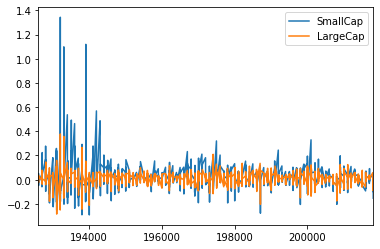

In [34]:
returns.plot.line()

In [35]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [36]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [40]:
return_per_month = (returns+1).prod()**(1/returns.shape[0]) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [44]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [45]:
# shortcut
annualized_return = (returns+1).prod()**(12/returns.shape[0])-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [46]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [48]:
# sharpe ratio
riskfree_rate = 0.03
excess_return = annualized_return-riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64